<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/MonteCarlo_Acierto_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montecarlo Acierto y Error**
*Vilchis García Karla Ivonne*



---


Consiste en interpretar la integral como el área bajo lacurva en una región rectangular, para algún valor c que acote la función en todo el intervalo de integración, ygenerar n puntos aleatorios (x, y) sobre dicho rectángulo. Luego, la probabilidadde acertar a la región bajo la curva es:
$$ p= \frac{\int_a^b g(x)x}{c(b-a)}=\frac{I}{c(b-a)} $$

El parámetro p puede ser estimado de:
$$ \overline{p}=\frac{n_a}{n} $$

donde $n_a$ es el número de puntos bajo o sobre la curva, es decir, los aciertos del muestreo. Y la integral puede ser, a su vez, estimada por:

$$ I \approx c(b-a)\frac{n_a}{n} $$

Como la generación de cada uno de los puntos aleatorios es independiente delos otros, este procedimiento define un experimento de Bernoulli con probabilidadp de acertar.

Aproximación de la integral: 0.6245


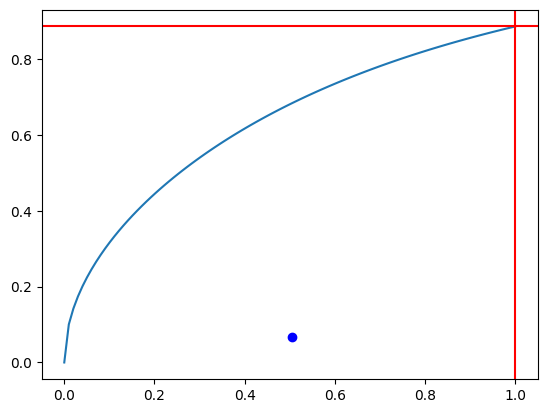

In [ ]:
import random as rd
from matplotlib  import pyplot as plt
import numpy as np

#definimos la función de la integral que queremos aproximar
def f(x):
    return np.sqrt(np.arctan(x))

x=np.linspace(0,1,100)
y=f(x)

#definimos la función para ver la probabilidad de que los números aleatorios estén por debajo de la curva formada por la función
def dardos(n):
    exitos = 0
    for i in range(n):
        u1 = rd.random()
        u2 = rd.random()
        if u2 <= f(u1):
           exitos += 1
    prob = exitos/n
    return prob, u1, u2

prob, u1, u2 = dardos(10000)
print("Aproximación de la integral:", prob)

#definimos lo que se graficará
plt.plot(x,y)
plt.axhline(f(1), color ="red")
plt.axvline(1, color ="red")
plt.scatter(u1, u2, color ="blue")
plt.show()

media: 0.6242802969395956
varianza: 0.004108530028171933


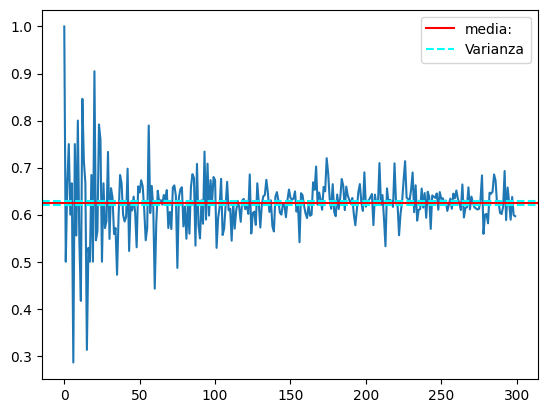

In [ ]:
def experimento(m):
    lista =[]
    for i in range(m):
        d =dardos(i+1)[0]
        lista.append(d)
    return lista

L=experimento(300)


#Graficamos la media y varianza
print("media:", np.mean(L))
print("varianza:", np.var(L))
plt.plot(L)
plt.axhline(y=np.mean(L), color='r', label="media:")
plt.axhline(y=np.mean(L)+np.var(L),color='cyan', linestyle='--', label="Varianza")
plt.axhline(y=np.mean(L)-np.var(L), color='cyan', linestyle='--')
plt.legend()
plt.show()

In [ ]:
from sympy import integrate, Symbol, sqrt, atan

x = Symbol('x')

#Calcula la integral
resultado = integrate(sqrt(atan(x)), (x, 0, 1))

#Evalua el resultado numericamente
RN = resultado.evalf()

print(RN)

0.629823344207973


In [ ]:
#calcula el error

error = abs(RN-prob)
print("error:", error)

error: 0.00532334420797331
